In [ ]:
 !pip install -Uqq fastbook

     |████████████████████████████████| 727kB 23.1MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 194kB 58.1MB/s 
     |████████████████████████████████| 1.1MB 56.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 


In [ ]:
import torch
from fastai.tabular.all import *

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/UmojaNaija/Train.csv')
test_df = pd.read_csv('/content/drive/My Drive/UmojaNaija/Test.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [ ]:
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [ ]:
df.nunique()

ID                        12079
Policy Start Date           376
Policy End Date             372
Gender                        7
Age                         110
First Transaction Date      376
No_Pol                        8
Car_Category                 16
Subject_Car_Colour           45
Subject_Car_Make             74
LGA_Name                    258
State                       111
ProductName                   9
target                        2
dtype: int64

In [ ]:
test_df.nunique()

ID                        5177
Policy Start Date          356
Policy End Date            363
Gender                       7
Age                         96
First Transaction Date     356
No_Pol                       8
Car_Category                14
Subject_Car_Colour          37
Subject_Car_Make            53
LGA_Name                   193
State                       81
ProductName                  9
dtype: int64

In [ ]:
df['target'].value_counts()

0    10624
1     1455
Name: target, dtype: int64

In [ ]:
dropped = ['ID']

In [ ]:
df = df.drop(dropped, axis=1)
test = test_df.drop(dropped, axis=1)

In [ ]:
df = add_datepart(df, 'Policy Start Date')
df = add_datepart(df, 'Policy End Date')
df = add_datepart(df, 'First Transaction Date')

In [ ]:
df.nunique()

Gender                                  7
Policy Start Week                      53
Policy End Week                        52
First Transaction Week                 53
Age                                   110
No_Pol                                  8
Car_Category                           16
Subject_Car_Colour                     45
Subject_Car_Make                       74
LGA_Name                              258
State                                 111
ProductName                             9
target                                  2
Policy Start Year                       8
Policy Start Month                     12
Policy Start Day                       31
Policy Start Dayofweek                  7
Policy Start Dayofyear                364
Policy Start Is_month_end               2
Policy Start Is_month_start             2
Policy Start Is_quarter_end             2
Policy Start Is_quarter_start           2
Policy Start Is_year_end                2
Policy Start Is_year_start        

In [ ]:
 test = add_datepart(test, 'Policy Start Date')
test = add_datepart(test, 'Policy End Date')
test = add_datepart(test, 'First Transaction Date')

In [ ]:
cont, cat = cont_cat_split(df, max_card=500, dep_var='target')

In [ ]:
 df['target'] = df['target'].astype('category')

In [ ]:
procs = [Categorify, FillMissing, Normalize]

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [ ]:
tp = TabularPandas(df, procs, cat, cont, splits=splits, y_names='target')

In [ ]:
len(tp.train), len(tp.valid)

(9664, 2415)

In [ ]:
dls = tp.dataloaders(512)

In [ ]:
learn = tabular_learner(dls, loss_func=CrossEntropyLossFlat(), metrics=F1Score())

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0030199517495930195)

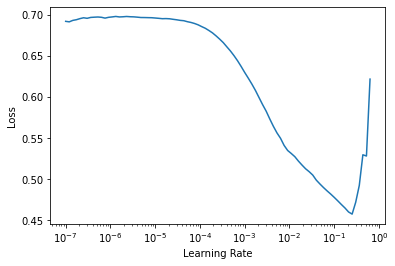

In [ ]:
learn.lr_find()

In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,f1_score,time
0,0.639655,0.638592,0.000000,00:00
1,0.519398,0.528460,0.000000,00:00
2,0.417453,0.425125,0.000000,00:00
3,0.350318,0.352916,0.089021,00:00
4,0.302897,0.335060,0.234818,00:00
5,0.267729,0.365212,0.277674,00:00
6,0.237516,0.387496,0.259635,00:00
7,0.211654,0.416239,0.277264,00:00
8,0.189903,0.423345,0.299484,00:00
9,0.170044,0.448736,0.265193,00:00


In [ ]:
test_preds = []
for i in range(len(test)):
    preds = learn.predict(test.iloc[i])[1].item()
    test_preds.append(preds)

In [ ]:
len(test_preds)

5177

In [ ]:
learn.save('mock2')

Path('models/mock2.pth')

In [ ]:
output = pd.DataFrame({'ID': test_df.ID, 'target': test_preds})

In [ ]:
output.to_csv('sub.csv', index=False)